<a href="https://colab.research.google.com/github/saipragna25/deep-learning-asgn-neural-networks-/blob/main/DL_NN_with_pytorch_lightening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pytorch_lightning as pl

In [ ]:
class MyNet(pl.LightningModule):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.criterion = nn.MSELoss()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y.unsqueeze(1))
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        optimizer = optim.SGD(self.parameters(), lr=0.01)
        return optimizer


In [ ]:
# Define a custom dataset class for the synthetic data
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
# Define the equation for generating synthetic data
def equation(x1, x2, x3):
    return 2 * x1 ** 2 - 3 * x2 ** 3 + 4 * x3

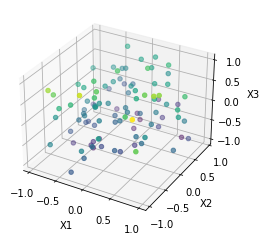

In [ ]:
# Generate synthetic data
n_samples = 100
x1 = np.random.uniform(-1, 1, size=n_samples)
x2 = np.random.uniform(-1, 1, size=n_samples)
x3 = np.random.uniform(-1, 1, size=n_samples)
y = equation(x1, x2, x3) + 0.1 * np.random.randn(n_samples)

# Plot the synthetic data using a 4D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

In [ ]:
# Convert the data to PyTorch tensors and create a PyTorch DataLoader
x = torch.tensor(np.column_stack((x1, x2, x3)), dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
dataset = MyDataset(x, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [ ]:
# Train the model using PyTorch Lightning Trainer
model = MyNet(3, 10, 1)
trainer = pl.Trainer(max_epochs=1000)
trainer.fit(model, dataloader)

/usr/local/lib/python3.9/dist-packages/lightning_fabric/accelerators/cuda.py:236: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params
--------------------------------------
0 | fc1       | Linear  | 40    
1 | relu1     | ReLU    | 0     
2 | fc2       | Linear  | 110   
3 | relu2     | ReLU    | 0     
4 | fc3       | Linear  | 11    
5 | criterion | MSELoss | 0     
--------------------------------------
161       Trainable par

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


In [ ]:
# Test the model
with torch.no_grad():
    x_test = torch.tensor(np.mgrid[-1:1:0.1, -1:1:0.1, -1:1:0.1].reshape(3, -1).T, dtype=torch.float32)
    y_test = model(x_test).squeeze().numpy()


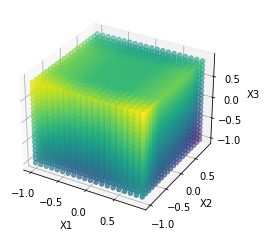

In [ ]:
# Plot the predicted values using a 4D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_test)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()